# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Create weather list
weather = []

# Set unit as imperial
unit = "imperial"

# Set counter for record, set and timesleep
x = 1
y = 1
z = 0

# print line to track status
print(f"Beginning Data Retrieval")

# Create for loop to perform API calls for each city
for city in cities:
    
    #print line to see status of retrieval
    print(f"Processing Record {x} of Set {y} | {city}")
    
    #set url
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = city
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + unit
    
    #try to retrieve the data
    try:
        response = requests.get(query_url).json()
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        temp_max = response['main']['temp_max']
        humid = response['main']['humidity']
        cloud = response ['clouds']['all']
        date = response['dt']
        wind = response['wind']['speed']
        country = response['sys']['country']
        dict = {'City': city,'Lat': lat, 'Lng': lng, 'Max Temp': temp_max, 'Humidity' : humid, 'Cloudiness' : cloud, 'Date':date, \
                'Wind Speed' : wind, 'Country':country}
        weather.append(dict)
    
    # except for keyError
    except KeyError:
        print(f"There was a Key Error")
        z = z+1
        
    # Add 1 to counters and set time sleep
    x += 1
    if x % 60 == 0:
        time.sleep(60)
        y +=1

# Get total key errors
print(f"There were {z} keyErrors")

Beginning Data Retrieval
Processing Record 1 of Set 1 | jasper
Processing Record 2 of Set 1 | murgab
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | khatanga
Processing Record 7 of Set 1 | shenjiamen
Processing Record 8 of Set 1 | grand river south east
There was a Key Error
Processing Record 9 of Set 1 | san cristobal
Processing Record 10 of Set 1 | dawlatabad
Processing Record 11 of Set 1 | paucartambo
There was a Key Error
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | farafangana
Processing Record 16 of Set 1 | east london
Processing Record 17 of Set 1 | pochutla
Processing Record 18 of Set 1 | chuy
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | eina
Processing Record 21 of Set 1 | morden
Processing Record 22 of Set 1 | hilo
Processing Record 23 of Se

Processing Record 186 of Set 4 | rocha
Processing Record 187 of Set 4 | eureka
Processing Record 188 of Set 4 | lolua
There was a Key Error
Processing Record 189 of Set 4 | hurghada
Processing Record 190 of Set 4 | galiwinku
There was a Key Error
Processing Record 191 of Set 4 | samfya
Processing Record 192 of Set 4 | sao joao da barra
Processing Record 193 of Set 4 | tuatapere
Processing Record 194 of Set 4 | radhanpur
Processing Record 195 of Set 4 | ahipara
Processing Record 196 of Set 4 | santa marta
Processing Record 197 of Set 4 | olafsvik
Processing Record 198 of Set 4 | talcahuano
Processing Record 199 of Set 4 | rock sound
Processing Record 200 of Set 4 | wuxi
Processing Record 201 of Set 4 | kodiak
Processing Record 202 of Set 4 | katsuura
Processing Record 203 of Set 4 | tual
Processing Record 204 of Set 4 | whitehorse
Processing Record 205 of Set 4 | longhua
Processing Record 206 of Set 4 | thompson
Processing Record 207 of Set 4 | mahajanga
Processing Record 208 of Set 4 |

Processing Record 376 of Set 7 | porto novo
Processing Record 377 of Set 7 | usinsk
Processing Record 378 of Set 7 | iralaya
Processing Record 379 of Set 7 | alghero
Processing Record 380 of Set 7 | tezu
Processing Record 381 of Set 7 | fomboni
Processing Record 382 of Set 7 | asprovalta
Processing Record 383 of Set 7 | purpe
Processing Record 384 of Set 7 | beloha
Processing Record 385 of Set 7 | kabare
Processing Record 386 of Set 7 | coquimbo
Processing Record 387 of Set 7 | khasan
Processing Record 388 of Set 7 | bereslavka
Processing Record 389 of Set 7 | denpasar
Processing Record 390 of Set 7 | nakamura
Processing Record 391 of Set 7 | abejorral
Processing Record 392 of Set 7 | castrillon
Processing Record 393 of Set 7 | nuuk
Processing Record 394 of Set 7 | chunskiy
Processing Record 395 of Set 7 | maniitsoq
Processing Record 396 of Set 7 | dong hoi
Processing Record 397 of Set 7 | sao filipe
Processing Record 398 of Set 7 | atar
Processing Record 399 of Set 7 | nikolayevskaya


Processing Record 565 of Set 10 | bilibino
Processing Record 566 of Set 10 | puerto madryn
Processing Record 567 of Set 10 | vasto
Processing Record 568 of Set 10 | jiuquan
Processing Record 569 of Set 10 | lenggries
Processing Record 570 of Set 10 | santa lucia
Processing Record 571 of Set 10 | curuguaty
Processing Record 572 of Set 10 | bang saphan
Processing Record 573 of Set 10 | khani
Processing Record 574 of Set 10 | a
There was a Key Error
Processing Record 575 of Set 10 | luderitz
Processing Record 576 of Set 10 | ayagoz
Processing Record 577 of Set 10 | eenhana
Processing Record 578 of Set 10 | coari
Processing Record 579 of Set 10 | konstantinovka
Processing Record 580 of Set 10 | kano
Processing Record 581 of Set 10 | cagayan de tawi-tawi
There was a Key Error
Processing Record 582 of Set 10 | kupang
Processing Record 583 of Set 10 | gigmoto
Processing Record 584 of Set 10 | kaya
Processing Record 585 of Set 10 | khandyga
Processing Record 586 of Set 10 | buraydah
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create dataframe from list of data retrieved
weather_df = pd.DataFrame(weather)

# Drop empty fields
weather_df = weather_df.dropna()

# Save the dataframe as a csv file
weather_df.to_csv('weather_output.csv', index = False)

# Print the dataframe
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Date,Wind Speed,Country
0,jasper,37.2001,-94.3502,64.40,82,90,1621129558,5.75,US
1,murgab,37.4966,61.9714,64.40,45,0,1621129558,4.61,TM
2,ushuaia,-54.8000,-68.3000,42.80,70,20,1621129559,7.00,AR
3,mahebourg,-20.4081,57.7000,73.40,78,20,1621129559,10.36,MU
4,bluff,-46.6000,168.3333,53.01,70,51,1621129559,5.01,NZ
...,...,...,...,...,...,...,...,...,...
554,baykit,61.6700,96.3700,33.49,53,33,1621130187,9.71,RU
555,loa janan,-0.5830,117.0950,84.78,75,87,1621130231,3.33,ID
556,nampula,-15.1165,39.2666,66.20,100,90,1621129932,4.61,MZ
557,klyuchevskiy,53.5317,119.4519,57.18,26,7,1621130291,10.83,RU


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
weather_df.describe()



,Lat,Lng,Max Temp,Humidity,Cloudiness,Date,Wind Speed
count,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02,559.000000
mean,19.502619,20.744262,63.668945,68.173524,54.053667,1.621130e+09,7.832021
std,33.324967,88.645936,16.138513,22.222650,40.836074,2.314557e+02,5.436009
min,-54.800000,-175.200000,15.350000,8.000000,0.000000,1.621129e+09,0.070000
25%,-8.969400,-58.103850,53.600000,53.000000,7.000000,1.621130e+09,3.465000
50%,23.833300,26.400000,64.400000,73.000000,69.000000,1.621130e+09,6.380000
75%,46.648600,99.572950,77.000000,86.000000,97.000000,1.621130e+09,11.385000
max,78.218600,179.316700,97.180000,100.000000,100.000000,1.621130e+09,34.000000


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [7]:
#Generate a timestamp for date data was ran (to use in plots)
today = pd.to_datetime("today").strftime("%m/%d/%Y")
today

'05/15/2021'

## Latitude vs. Temperature Plot

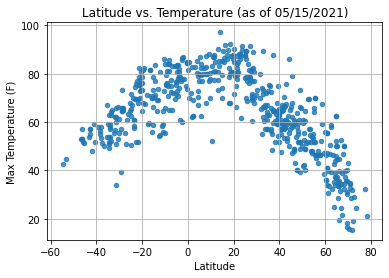

In [25]:
# Generate scatter plot
weather_df.plot(x ='Lat', y='Max Temp', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Temperature (as of {today})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
# Save plot as PNG file
plt.savefig('Images/Lat vs Temp.png')
plt.show()



## Latitude vs. Humidity Plot

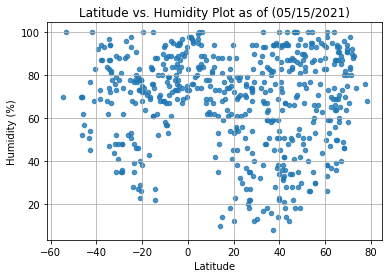

In [26]:
# Generate scatter plot
weather_df.plot(x ='Lat', y='Humidity', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Humidity Plot as of ({today})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Save as png
plt.savefig('Images/Lat vs Humidity.png')
plt.show()


## Latitude vs. Cloudiness Plot

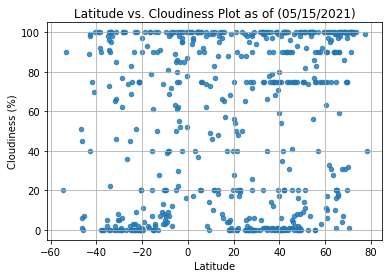

In [27]:
# Generate scatter plot
weather_df.plot(x ='Lat', y='Cloudiness', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Cloudiness Plot as of ({today})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save as PNG
plt.savefig('Images/Lat vs Cloudiness.png')
plt.show()


## Latitude vs. Wind Speed Plot

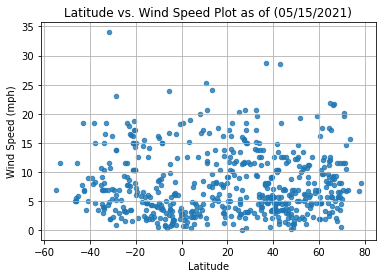

In [28]:
# Generate scatter plot
weather_df.plot(x ='Lat', y='Wind Speed', kind = 'scatter', grid = True, alpha = .8)
plt.title(f"Latitude vs. Wind Speed Plot as of ({today})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Save as PNG
plt.savefig('Images/Lat vs Wind Speed.png')
plt.show()


## Linear Regression

In [12]:
n_hem = weather_df.loc[weather_df["Lat"] >= 0, 'Lat']
s_hem = weather_df.loc[weather_df["Lat"] < 0, 'Lat']
n_hem_temp =  weather_df.loc[weather_df["Lat"] >= 0,'Max Temp']
s_hem_temp =  weather_df.loc[weather_df["Lat"] < 0,'Max Temp']
n_hem_hum =  weather_df.loc[weather_df["Lat"] >= 0,'Humidity']
s_hem_hum =  weather_df.loc[weather_df["Lat"] < 0,'Humidity']
n_hem_cloud =  weather_df.loc[weather_df["Lat"] >= 0,'Cloudiness']
s_hem_cloud =  weather_df.loc[weather_df["Lat"] < 0,'Cloudiness']
n_hem_wind =  weather_df.loc[weather_df["Lat"] >= 0,'Wind Speed']
s_hem_wind =  weather_df.loc[weather_df["Lat"] < 0,'Wind Speed']



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

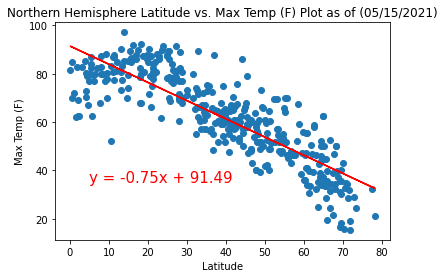

the r-value is -0.8387276626376419


In [29]:
# Set x and y values
x_values = n_hem
y_values = n_hem_temp

# Calculate regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,35),fontsize=15,color="red")

# Create title, labels
plt.title(f"Northern Hemisphere Latitude vs. Max Temp (F) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save as PNG
plt.savefig('Images/Lat vs Max Temp N.Hem.png')
plt.show()
print(f"the r-value is {rvalue}")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

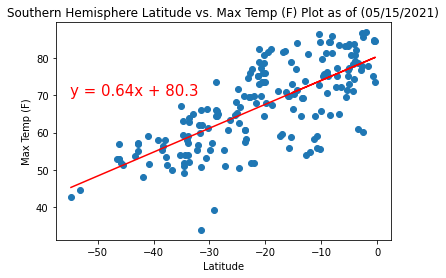

the r-value is 0.7302547842043156


In [30]:
# Set x and y values
x_values = s_hem
y_values = s_hem_temp

# Calulate regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,70),fontsize=15,color="red")

# Creates titles, labels
plt.title(f"Southern Hemisphere Latitude vs. Max Temp (F) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# Save as PNG
plt.savefig('Images/Lat vs Max Temp S.Hem.png')
plt.show()
print(f"the r-value is {rvalue}")


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

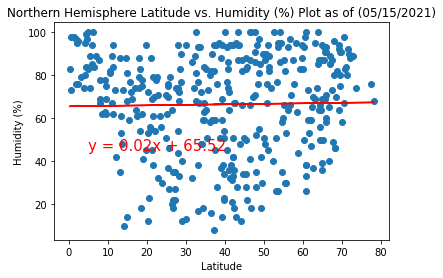

the r-value is 0.01956017005962567


In [31]:
# Set x and y values
x_values = n_hem
y_values = n_hem_hum

# Calculate regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5,45),fontsize=15,color="red")

# Create title and labels
plt.title(f"Northern Hemisphere Latitude vs. Humidity (%) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# Save as PNG
plt.savefig('Images/Lat vs Humidity N.Hem.png')
plt.show()
print(f"the r-value is {rvalue}")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

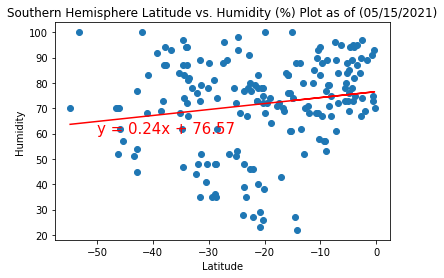

the r-value is 0.16741607242655293


In [32]:
# Set x and y values
x_values = s_hem
y_values = s_hem_hum

# Calculate regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")

# Create title and labels
plt.title(f"Southern Hemisphere Latitude vs. Humidity (%) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Save as PNG
plt.savefig('Images/Lat vs Humidity (%) S.Hem.png')
plt.show()
print(f"the r-value is {rvalue}")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

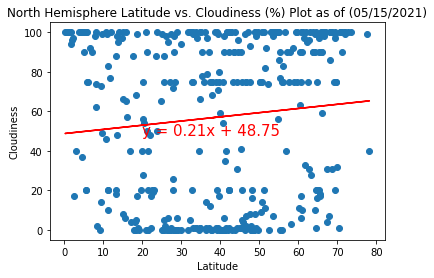

the r-value is 0.1029201140767342


In [33]:
# Set x and y values
x_values = n_hem
y_values = n_hem_cloud

# Calculate regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,48),fontsize=15,color="red")

# Create title and labels
plt.title(f"North Hemisphere Latitude vs. Cloudiness (%) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save as PNG
plt.savefig('Images/Lat vs Cloudiness (%) N.Hem.png')
plt.show()
print(f"the r-value is {rvalue}")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

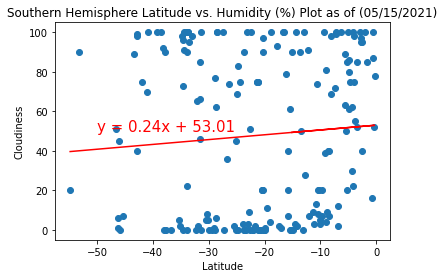

the r-value is 0.07783404768292017


In [34]:
# Set x and y values
x_values = s_hem
y_values = s_hem_cloud

# Calculate regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")

# Create title and labels
plt.title(f"Southern Hemisphere Latitude vs. Humidity (%) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Save as PNG
plt.savefig('Images/Lat vs Cloudiness S.Hem.png')
plt.show()
print(f"the r-value is {rvalue}")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

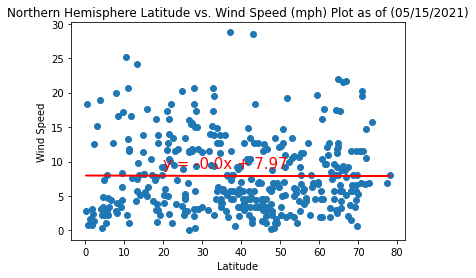

the r-value is -0.0032295720403230834


In [35]:
# Set x and y values
x_values = n_hem
y_values = n_hem_wind

# Calculate regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20, 9),fontsize=15,color="red")

# Create tile and labels
plt.title(f"Northern Hemisphere Latitude vs. Wind Speed (mph) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save as PNG
plt.savefig('Images/Lat vs Wind Speed N.Hem.png')
plt.show()
print(f"the r-value is {rvalue}")


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

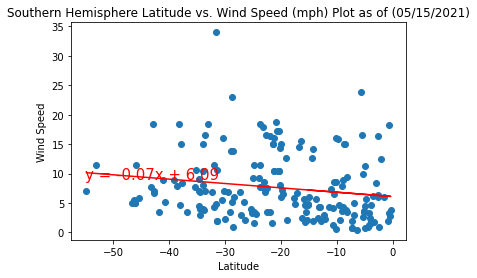

the r-value is -0.1721991016726608


In [36]:
#Set x and y values
x_values = s_hem
y_values = s_hem_wind

# Calculate regression analysis
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generate scatter plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55, 9),fontsize=15,color="red")

# Create title and labels
plt.title(f"Southern Hemisphere Latitude vs. Wind Speed (mph) Plot as of ({today})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Save as PNG
plt.savefig('Images/Lat vs Wind Speed S.Hem.png')
plt.show()
print(f"the r-value is {rvalue}")
